### Options Data from WRDS
Link: https://wrds-www.wharton.upenn.edu/pages/about/data-vendors/optionmetrics/


| Column	| Meaning |
| --------- | :------ |
| secid	| Internal security identifier for the underlying asset (unique across time).| 
| date	| Trade/quote date (observation date).| 
| symbol	| Ticker symbol of the underlying security.| 
| symbol_flag	| Indicator for special cases in the symbol (e.g., corporate actions, temporary tickers).| 
| exdate	| Option expiration date.| 
| last_date	| Last trading date for the contract (often same as exdate for US equity options).| 
| cp_flag	| Call/Put flag — usually "C" for call, "P" for put.| 
| strike_price	| Strike price of the option (often stored as integer × 1000 in raw data; check units).| 
| best_bid	| Best bid price in the market at the observation time.| 
| best_offer	| Best ask/offer price in the market at the observation time.| 
| volume	| Trading volume (number of contracts traded that day).| 
| open_interest	| Number of outstanding contracts at the end of the day.| 
| impl_volatility	| Implied volatility (annualized, decimal form) derived from option prices.| 
| delta	| Option delta — sensitivity of option price to a $1 change in underlying price.| 
| gamma	| Option gamma — sensitivity of delta to a $1 change in underlying price.| 
| vega	| Option vega — sensitivity of option price to a 1 percentage point change in implied volatility.| 
| theta	| Option theta — sensitivity of option price to one day’s passage of time.| 
| optionid	| Unique identifier for the specific option contract.| 
| cfadj	| Cumulative factor adjustment for corporate actions (splits, dividends, etc.).| 
| am_settlement	| Flag for AM‑settled options (settled based on morning opening prices).| 
| contract_size	| Number of underlying shares per contract (usually 100 for US equity options).| 
| ss_flag	| Special settlement flag (e.g., early exercise restrictions, special terms).| 
| forward_price	| Forward price of the underlying for the option’s maturity (used in IV calc).| 
| expiry_indicator	| Code indicating standard vs. non‑standard expiry (e.g., weekly, quarterly).| 
| root	| Option root symbol (base symbol before strike/expiry codes).| 
| suffix	| Additional contract code suffix (e.g., for LEAPS, weeklies).| 

In [93]:
import wrds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
db = wrds.Connection(wrds_username='ayansola')
# setup pg_pass needed for access to the wrds dataset (first time only)
# db.create_pgpass_file()

In [19]:
data = db.get_table(library='optionm', table='opprcd2023', obs=10)
data

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix
0,5139.0,2023-01-03,CAE 230120C12500,1,2023-01-20,<NA>,C,12500.0,5.9,8.7,...,-12.42606,150842156.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
1,5139.0,2023-01-03,CAE 230120C15000,1,2023-01-20,<NA>,C,15000.0,3.3,6.4,...,-11.77969,150842157.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
2,5139.0,2023-01-03,CAE 230120C17500,1,2023-01-20,<NA>,C,17500.0,1.45,3.7,...,-12.07106,150842158.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
3,5139.0,2023-01-03,CAE 230120C20000,1,2023-01-20,2022-12-29,C,20000.0,0.2,0.5,...,-5.266991,150842159.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
4,5139.0,2023-01-03,CAE 230120C22500,1,2023-01-20,2023-01-03,C,22500.0,0.0,1.65,...,-16.99363,150842160.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
5,5139.0,2023-01-03,CAE 230120C25000,1,2023-01-20,<NA>,C,25000.0,0.0,1.65,...,-20.66474,150842161.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
6,5139.0,2023-01-03,CAE 230120C30000,1,2023-01-20,<NA>,C,30000.0,0.0,1.65,...,-25.32404,150842162.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
7,5139.0,2023-01-03,CAE 230120P12500,1,2023-01-20,<NA>,P,12500.0,0.0,1.65,...,-22.73323,150842163.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
8,5139.0,2023-01-03,CAE 230120P15000,1,2023-01-20,<NA>,P,15000.0,0.0,1.7,...,-20.46607,150842164.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>
9,5139.0,2023-01-03,CAE 230120P17500,1,2023-01-20,2022-11-30,P,17500.0,0.0,0.4,...,-6.191176,150842165.0,1.0,0.0,100.0,0,<NA>,<NA>,<NA>,<NA>


In [21]:
data.columns

Index(['secid', 'date', 'symbol', 'symbol_flag', 'exdate', 'last_date',
       'cp_flag', 'strike_price', 'best_bid', 'best_offer', 'volume',
       'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta',
       'optionid', 'cfadj', 'am_settlement', 'contract_size', 'ss_flag',
       'forward_price', 'expiry_indicator', 'root', 'suffix'],
      dtype='object')

In [31]:
data.dtypes

secid               object
date                object
symbol              object
symbol_flag         object
exdate              object
last_date           object
cp_flag             object
strike_price        object
best_bid            object
best_offer          object
volume              object
open_interest       object
impl_volatility     object
delta               object
gamma               object
vega                object
theta               object
optionid            object
cfadj               object
am_settlement       object
contract_size       object
ss_flag             object
forward_price       object
expiry_indicator    object
root                object
suffix              object
dtype: object

__EDA Plan:__

- Stage 1 (prototype): 1 underlying (e.g., AAPL), 3 months, end-of-day quotes only, key columns only.
- Stage 2 (richer variation): 1 underlying, 12 months.
- Stage 3 (cross-sectional taste): 5 underlyings (e.g., AAPL, WMT, AMZN, UNH, XOM), 12 months.

### Stage 1

In [49]:
# filter by APPLE INC secids and fro dec 2023
params = {
    "sec_ids": ("101594", "505270"),
    "from_date": "2023-01-01",
    "to_date": "2023-01-31"
}

data = db.raw_sql(
    """
    SELECT date,secid,symbol,cp_flag,exdate,strike_price,best_bid,
           best_offer,volume,open_interest,impl_volatility,delta,
           vega,theta,forward_price,expiry_indicator
    FROM optionm.opprcd2023
    WHERE secid IN %(sec_ids)s
      AND date BETWEEN %(from_date)s AND %(to_date)s
    """,
    params=params,
)

In [50]:
data.dtypes

date                string[python]
secid                      Float64
symbol              string[python]
cp_flag             string[python]
exdate              string[python]
strike_price               Float64
best_bid                   Float64
best_offer                 Float64
volume                     Float64
open_interest              Float64
impl_volatility            Float64
delta                      Float64
vega                       Float64
theta                      Float64
forward_price       string[python]
expiry_indicator    string[python]
dtype: object

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46944 entries, 0 to 46943
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              46944 non-null  string 
 1   secid             46944 non-null  Float64
 2   symbol            46944 non-null  string 
 3   cp_flag           46944 non-null  string 
 4   exdate            46944 non-null  string 
 5   strike_price      46944 non-null  Float64
 6   best_bid          46944 non-null  Float64
 7   best_offer        46944 non-null  Float64
 8   volume            46944 non-null  Float64
 9   open_interest     46944 non-null  Float64
 10  impl_volatility   41723 non-null  Float64
 11  delta             41723 non-null  Float64
 12  vega              41723 non-null  Float64
 13  theta             41723 non-null  Float64
 14  forward_price     0 non-null      string 
 15  expiry_indicator  15378 non-null  string 
dtypes: Float64(10), string(6)
memory usage: 

In [52]:
data.head()

,date,secid,symbol,cp_flag,exdate,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,vega,theta,forward_price,expiry_indicator
0,2023-01-03,101594.0,AAPL 230113P250000,P,2023-01-13,250000.0,124.6,124.9,0.0,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,w
1,2023-01-03,101594.0,AAPL 230120P142000,P,2023-01-20,142000.0,16.7,17.0,3.0,161.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2023-01-03,101594.0,AAPL 230120P143000,P,2023-01-20,143000.0,17.7,17.95,52.0,280.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2023-01-03,101594.0,AAPL 230120P144000,P,2023-01-20,144000.0,18.65,18.9,20.0,121.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2023-01-03,101594.0,AAPL 230113P245000,P,2023-01-13,245000.0,119.6,119.9,0.0,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,w


In [54]:
# calculate mid of best bid and offer, and keep only rows with positve mid price, implied volatility and volume
data = (
    data.assign(mid_price=lambda x: (x.best_bid + x.best_offer) / 2)
      .query("mid_price > 0 and impl_volatility > 0 and volume > 0")
)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25314 entries, 5 to 46940
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              25314 non-null  string 
 1   secid             25314 non-null  Float64
 2   symbol            25314 non-null  string 
 3   cp_flag           25314 non-null  string 
 4   exdate            25314 non-null  string 
 5   strike_price      25314 non-null  Float64
 6   best_bid          25314 non-null  Float64
 7   best_offer        25314 non-null  Float64
 8   volume            25314 non-null  Float64
 9   open_interest     25314 non-null  Float64
 10  impl_volatility   25314 non-null  Float64
 11  delta             25314 non-null  Float64
 12  vega              25314 non-null  Float64
 13  theta             25314 non-null  Float64
 14  forward_price     0 non-null      string 
 15  expiry_indicator  8591 non-null   string 
 16  mid_price         25314 non-null  Float64
dty

In [96]:
# Compute Days To Expiry (DTE): business days from date to exdate; 
# assign to buckets (e.g. 7, 30, 60, 90 days to expiry).
def assign_dte_bucket(dte):
    return min([7,30,60,90], key=lambda x: abs(dte-x))

data["dte"] = (pd.to_datetime(data["exdate"]) - pd.to_datetime(data["date"])).dt.days
data = data[data["dte"].between(1, 365)]
data["dte_bucket"] = data["dte"].apply(assign_dte_bucket)
data.head()

/var/folders/g0/21_2mymx5mn788q92btxg65m0000gn/T/ipykernel_54525/655952523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dte"] = (pd.to_datetime(data["exdate"]) - pd.to_datetime(data["date"])).dt.days


,date,secid,symbol,cp_flag,exdate,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,vega,theta,forward_price,expiry_indicator,mid_price,dte,dte_bucket
5,2023-01-03,101594.0,AAPL 230106C100000,C,2023-01-06,100000.0,25.15,25.45,92.0,262.0,1.371282,0.968879,0.795774,-70.23836,<NA>,w,25.3,3,7
6,2023-01-03,101594.0,AAPL 230106C105000,C,2023-01-06,105000.0,20.2,20.45,82.0,66.0,1.14182,0.959495,0.988465,-72.60153,<NA>,w,20.325,3,7
7,2023-01-03,101594.0,AAPL 230106C110000,C,2023-01-06,110000.0,15.25,15.45,199.0,148.0,0.907767,0.945788,1.245106,-73.02496,<NA>,w,15.35,3,7
8,2023-01-03,101594.0,AAPL 230106C111000,C,2023-01-06,111000.0,14.2,14.55,15.0,3.0,0.875116,0.939206,1.364796,-76.81592,<NA>,w,14.375,3,7
9,2023-01-03,101594.0,AAPL 230106C112000,C,2023-01-06,112000.0,13.3,13.45,17.0,9.0,0.822883,0.935905,1.423225,-75.37433,<NA>,w,13.375,3,7


In [97]:
# compute delta bucket
def delta_bucket(row):
    d = abs(row["delta"])
    if 0.45 <= d <= 0.55: return "ATM"
    if 0.20 <= d < 0.30 and row["cp_flag"]=="P": return "25P"
    if 0.08 <= d < 0.12 and row["cp_flag"]=="P": return "10P"
    if 0.20 <= d < 0.30 and row["cp_flag"]=="C": return "25C"
    if 0.08 <= d < 0.12 and row["cp_flag"]=="C": return "10C"
    return None

data["delta_bucket"] = data.apply(delta_bucket, axis=1)

In [104]:
def data_quality_dashboard(df, dte_col='dte_bucket', delta_col='delta_bucket'):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    # 1. Bid-Ask Spread Distribution
    sns.histplot(df['best_offer'] - df['best_bid'], bins=25, ax=axes[0])
    axes[0].set_title("Bid-Ask Spread Distribution")
    axes[0].set_xlabel("Spread ($)")

    # 2. Implied Volatility Distribution
    sns.histplot(df['impl_volatility'], bins=25, ax=axes[1])
    axes[1].set_title("Implied Volatility Distribution")
    axes[1].set_xlabel("IV (decimal)")
    
    # 3. Coverage Heatmap
    coverage = df.groupby([dte_col, delta_col]).size().unstack(fill_value=0)
    sns.heatmap(coverage, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title("Quote Coverage by DTE × Delta Bucket")
    
    # Hide unused subplot if odd number
    fig.delaxes(axes[3])

    plt.tight_layout()
    plt.show()

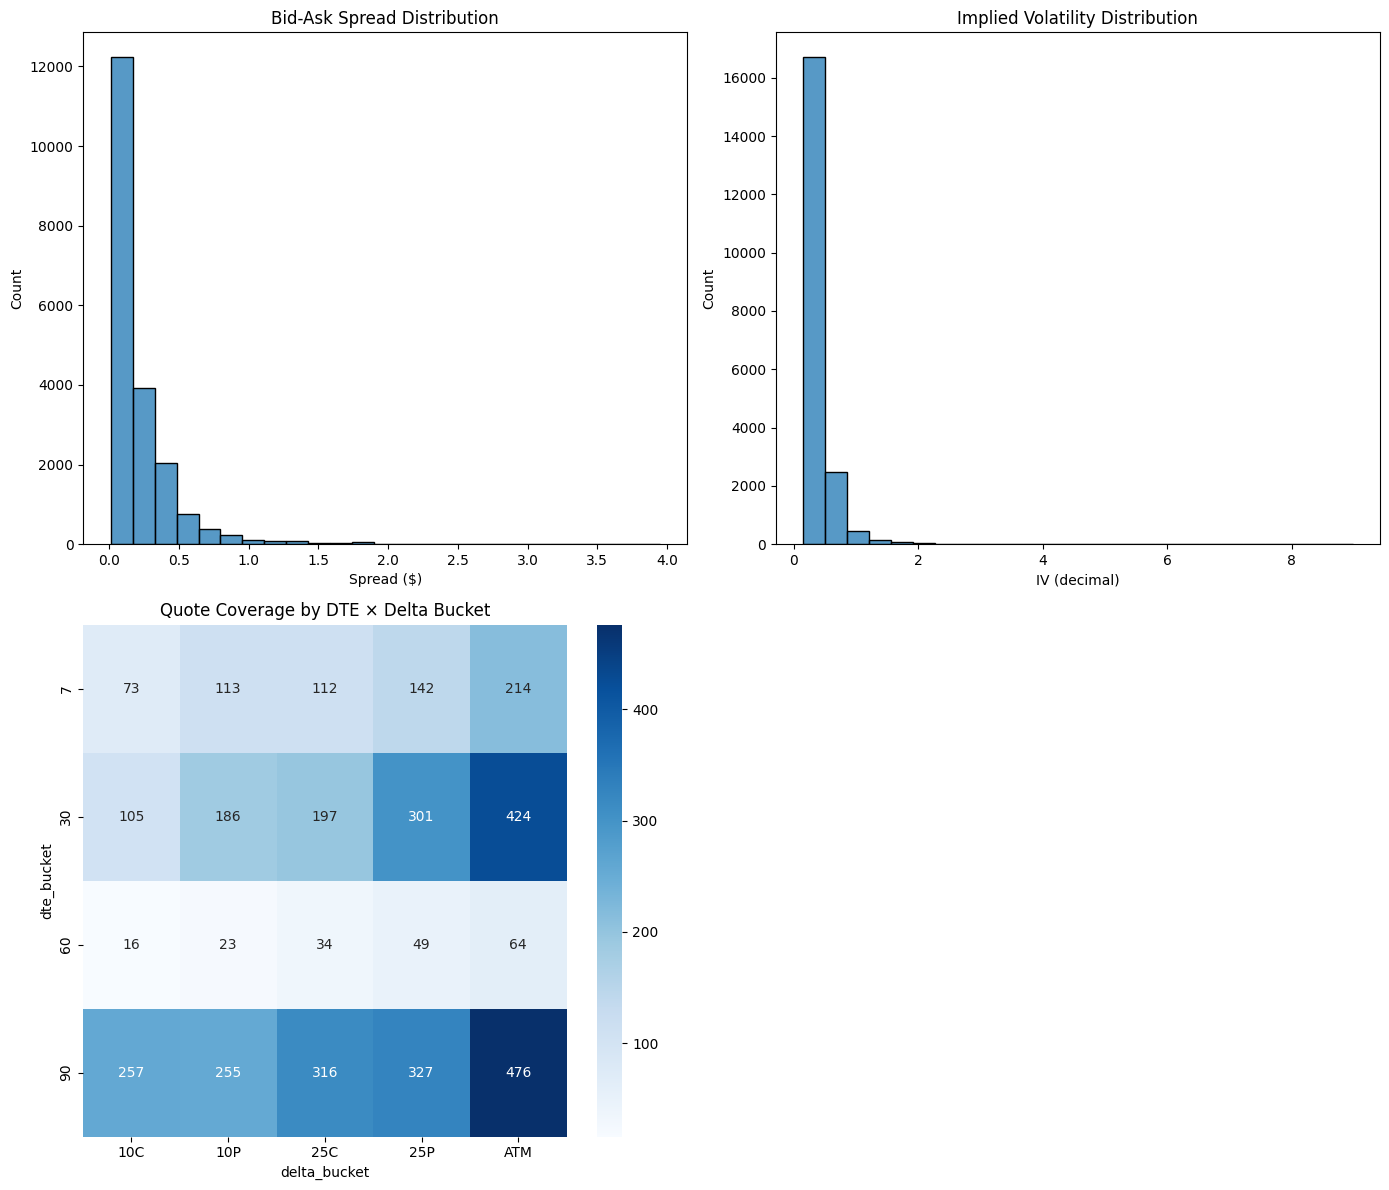

In [105]:
data_quality_dashboard(data)

In [107]:
grid = (data.dropna(subset=["delta_bucket"])
          .groupby(["date","symbol","dte_bucket","delta_bucket"])
          .agg(iv=("impl_volatility","median"),
               spread=("best_offer","median"))
          .reset_index())
grid

,date,symbol,dte_bucket,delta_bucket,iv,spread
0,2023-01-03,AAPL 230106C125000,7,ATM,0.553825,2.57
1,2023-01-03,AAPL 230106C126000,7,ATM,0.545018,2.06
2,2023-01-03,AAPL 230106C129000,7,25C,0.514301,0.92
3,2023-01-03,AAPL 230106C130000,7,25C,0.507551,0.67
4,2023-01-03,AAPL 230106C133000,7,10C,0.502885,0.25
...,...,...,...,...,...,...
3679,2023-01-31,AAPL 240119P105000,90,10P,0.346302,3.25
3680,2023-01-31,AAPL 240119P125000,90,25P,0.313582,7.15
3681,2023-01-31,AAPL 240119P130000,90,25P,0.304855,8.55
3682,2023-01-31,AAPL 240119P150000,90,ATM,0.278731,16.6


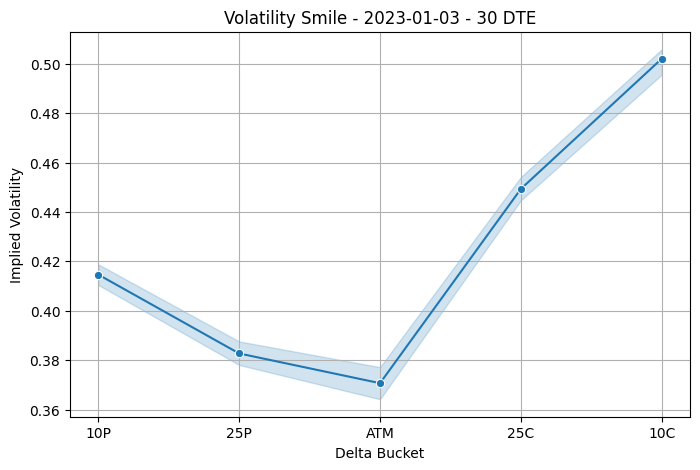

In [109]:
def plot_smile(grid, date, dte_bucket):
    # Filter for the chosen date and DTE bucket
    df_plot = grid[(grid['date'] == date) & (grid['dte_bucket'] == dte_bucket)]
    
    # Order delta buckets from deep put to deep call
    order = ["10P", "25P", "ATM", "25C", "10C"]
    
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df_plot, x='delta_bucket', y='iv', sort=False, marker='o')
    plt.title(f"Volatility Smile - {date} - {dte_bucket} DTE")
    plt.xlabel("Delta Bucket")
    plt.ylabel("Implied Volatility")
    plt.xticks(ticks=range(len(order)), labels=order)
    plt.grid(True)
    plt.show()

plot_smile(grid, "2023-01-03", 30)